<a href="https://colab.research.google.com/github/allansdefreitas/unsupervised-learning/blob/main/FUZZY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd

In [60]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [61]:
"""
I. Considere os dados "Image Segmentation" do site uci machine learning
repository (https://archive.ics.uci.edu/ml/datasets/Image+Segmentation).


"""

'\nI. Considere os dados "Image Segmentation" do site uci machine learning\nrepository (https://archive.ics.uci.edu/ml/datasets/Image+Segmentation).\n\n\n'

In [62]:
PATH = 'https://raw.githubusercontent.com/allansdefreitas/unsupervised-learning/main/segmentation.data'

In [63]:

dataset_original = pd.read_csv(PATH, sep=',').reset_index(drop=True)
dataset_original

,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,140.0,125.0,9,0.000000,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,188.0,133.0,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,105.0,139.0,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,34.0,137.0,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,39.0,111.0,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,36.0,243.0,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
206,186.0,218.0,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
207,197.0,236.0,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
208,208.0,240.0,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [64]:
"""
Considere 3 datasets: 

o primeiro considerando as variáveis 4 a 9 (shape)

"""

dataset_1_shape = dataset_original.iloc[:,3:9]
dataset_1_shape

,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD
0,0.000000,0.0,0.277778,0.062963,0.666667,0.311111
1,0.000000,0.0,0.333333,0.266667,0.500000,0.077778
2,0.000000,0.0,0.277778,0.107407,0.833333,0.522222
3,0.000000,0.0,0.500000,0.166667,1.111111,0.474074
4,0.000000,0.0,0.722222,0.374074,0.888889,0.429629
...,...,...,...,...,...,...
205,0.111111,0.0,1.888889,1.851851,2.000000,0.711110
206,0.000000,0.0,1.166667,0.744444,1.166667,0.655555
207,0.000000,0.0,2.444444,6.829628,3.333333,7.599998
208,0.111111,0.0,1.055556,0.862963,2.444444,5.007407


In [65]:
"""

o segundo considerando as variaveis 10 a 19 (rgb), 

"""

dataset_2_rgb = dataset_original.iloc[:,9:19]
dataset_2_rgb

,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
...,...,...,...,...,...,...,...,...,...,...
205,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
206,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
207,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
208,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [66]:
"""
o terceiro considerando as variaveis 4 a 19 (shape + rgb)

"""

dataset_shape_rgb = dataset_original.iloc[:,3:19]
dataset_shape_rgb

,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,0.000000,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
206,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
207,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
208,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [67]:
"""
Em cada dataset execute o algoritmo FCM com a distância de City-Block
50 vezes para obter uma partição fuzzy em 7 grupos e selecione o melhor
resultado segundo a função objetivo.


#PARA dataset_1_shape (features 4 a 9)

"""

'\nEm cada dataset execute o algoritmo FCM com a distância de City-Block\n50 vezes para obter uma partição fuzzy em 7 grupos e selecione o melhor\nresultado segundo a função objetivo.\n\n'

In [68]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [186]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy
from sklearn.preprocessing import StandardScaler

In [189]:
X_dataset_1_shape = dataset_1_shape.values

X_dataset_1_shape, X_dataset_1_shape.shape

(array([[0.        , 0.        , 0.2777779 , 0.06296301, 0.66666675,
         0.31111118],
        [0.        , 0.        , 0.33333334, 0.26666674, 0.5       ,
         0.07777774],
        [0.        , 0.        , 0.27777782, 0.10740744, 0.83333325,
         0.52222216],
        ...,
        [0.        , 0.        , 2.4444444 , 6.829628  , 3.3333333 ,
         7.599998  ],
        [0.11111111, 0.        , 1.0555557 , 0.86296326, 2.4444444 ,
         5.007407  ],
        [0.        , 0.        , 0.5       , 0.34960312, 2.3888886 ,
         2.0807757 ]]),
 (210, 6))

In [190]:
scaler = StandardScaler()
X_dataset_1_shape = scaler.fit_transform(X_dataset_1_shape)
X_dataset_1_shape

array([[-0.28718326, -0.21160368, -0.52285631, -0.13035889, -0.40477019,
        -0.11658619],
       [-0.28718326, -0.21160368, -0.50522349, -0.12566442, -0.43958796,
        -0.11898778],
       [-0.28718326, -0.21160368, -0.52285634, -0.12933464, -0.36995247,
        -0.11441333],
       ...,
       [-0.28718326, -0.21160368,  0.16482524,  0.02558287,  0.15231385,
        -0.04156512],
       [ 3.48209707, -0.21160368, -0.27599624, -0.11192241, -0.03338084,
        -0.06824944],
       [-0.28718326, -0.21160368, -0.4523249 , -0.1237531 , -0.04498681,
        -0.09837187]])

In [191]:
R_dataset_1_shape = skfuzzy.cmeans(data = X_dataset_1_shape.T, c = 7, m = 2, error=0.005, maxiter= 1000, init=None)
R_dataset_1_shape

(array([[-0.26054884, -0.10859623,  0.27271664,  0.18989937,  2.96393131,
          0.6254767 ],
        [-0.28401226, -0.2029365 , -0.01820271, -0.0759004 , -0.06181919,
         -0.08801484],
        [-0.13269726,  3.73498196,  0.26465827,  0.03333839,  0.488444  ,
          0.04404456],
        [-0.28592539, -0.20822037, -0.37082195, -0.11660505, -0.36426354,
         -0.10977644],
        [-0.25440156,  3.42368004,  6.13783008,  0.63489675,  5.00366711,
          0.50684533],
        [-0.27321795, -0.17167412,  0.72743608,  0.0234998 ,  0.2588684 ,
         -0.01609859],
        [ 3.46292122, -0.17446602, -0.12171755, -0.07604862, -0.07976145,
         -0.08096511]]),
 array([[1.82370525e-03, 1.72397112e-03, 1.73717513e-03, ...,
         7.48518825e-03, 1.21055086e-03, 6.38952408e-03],
        [6.13090978e-02, 5.77966961e-02, 6.10191324e-02, ...,
         6.84228045e-01, 2.02786014e-03, 3.41246267e-01],
        [1.35101820e-03, 1.29553246e-03, 1.26737645e-03, ...,
         3.997287

In [192]:
type(R_dataset_1_shape)

tuple

In [194]:
#matrix of probabilities
U = R_dataset_1_shape[1]
U

array([[1.82370525e-03, 1.72397112e-03, 1.73717513e-03, ...,
        7.48518825e-03, 1.21055086e-03, 6.38952408e-03],
       [6.13090978e-02, 5.77966961e-02, 6.10191324e-02, ...,
        6.84228045e-01, 2.02786014e-03, 3.41246267e-01],
       [1.35101820e-03, 1.29553246e-03, 1.26737645e-03, ...,
        3.99728797e-03, 9.88430552e-04, 3.96860903e-03],
       ...,
       [2.62644313e-04, 2.51978032e-04, 2.46554968e-04, ...,
        8.60131743e-04, 3.05604457e-04, 7.85482794e-04],
       [1.13092495e-02, 1.08527343e-02, 1.08131258e-02, ...,
        1.90345606e-01, 1.89930148e-03, 4.30900061e-02],
       [1.60873506e-03, 1.54480222e-03, 1.50593287e-03, ...,
        4.42401201e-03, 9.91549686e-01, 4.60268663e-03]])

In [201]:
U.shape

(7, 210)

In [202]:
U[6][0]

0.0016087350560813406

In [203]:
sum = 0
for i in range(7):
  sum +=  U[i][0]

print(sum)

1.0


In [204]:
#to which group each i-th element belongs
predictions = U.argmax(0)
predictions

array([3, 3, 3, 3, 3, 3, 6, 1, 3, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 1,
       3, 3, 1, 1, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 6, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 6, 6, 3, 3, 1, 3, 3,
       4, 3, 1, 0, 2, 3, 4, 3, 3, 3, 3, 4, 3, 5, 3, 5, 3, 0, 3, 1, 1, 3,
       3, 3, 3, 3, 1, 1, 1, 1, 5, 3, 5, 1, 5, 1, 3, 3, 1, 6, 1, 3, 1, 1,
       1, 3, 3, 3, 5, 5, 2, 5, 3, 0, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 6, 0, 1, 5,
       2, 3, 1, 5, 6, 5, 5, 1, 0, 1, 1, 5, 6, 0, 5, 1, 2, 1, 5, 2, 1, 1,
       5, 2, 1, 1, 3, 6, 6, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 5, 1, 6, 1,
       3, 3, 6, 6, 3, 3, 3, 6, 3, 1, 6, 3])

In [205]:
type(X_dataset_1_shape), X_dataset_1_shape.shape

(numpy.ndarray, (210, 6))

In [206]:
X_dataset_1_shape

array([[-0.28718326, -0.21160368, -0.52285631, -0.13035889, -0.40477019,
        -0.11658619],
       [-0.28718326, -0.21160368, -0.50522349, -0.12566442, -0.43958796,
        -0.11898778],
       [-0.28718326, -0.21160368, -0.52285634, -0.12933464, -0.36995247,
        -0.11441333],
       ...,
       [-0.28718326, -0.21160368,  0.16482524,  0.02558287,  0.15231385,
        -0.04156512],
       [ 3.48209707, -0.21160368, -0.27599624, -0.11192241, -0.03338084,
        -0.06824944],
       [-0.28718326, -0.21160368, -0.4523249 , -0.1237531 , -0.04498681,
        -0.09837187]])

In [226]:
X = X_dataset_1_shape
preds = predictions

0
1
2
3
4
5
6


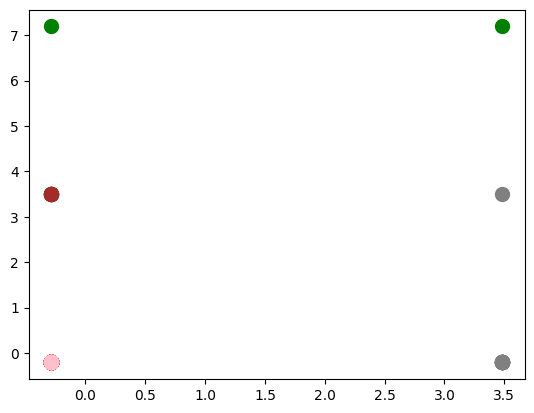

In [233]:
#let's see
colors = ['blue', 'orange', 'green', 'red', 'brown', 'pink', 'gray']
for i in range(7):
  print(i)
  plt.scatter(X[preds == i, 0], X[preds == i, 1], s=100, c = colors[i], label='Cluster ' + str(i + 1))

In [209]:
R_dataset_1_shape = np.asarray(R_dataset_1_shape)
R_dataset_1_shape.shape, type(R_dataset_1_shape)

<ipython-input-209-d831f6b5820c>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  R_dataset_1_shape = np.asarray(R_dataset_1_shape)


((7,), numpy.ndarray)

In [210]:
R_dataset_1_shape[0][6][0]

3.4629212161050678

In [211]:
sum = 0
for i in range(5):
  sum = R_dataset_1_shape[0][i][0]

print(sum)

-0.25440155980875623


In [212]:
import numpy as np


def initialize_membership_matrix(n_samples, n_clusters):
    """
    Initializes the membership matrix for Fuzzy C-Means.

    Parameters:
        n_samples (int): Number of data points.
        n_clusters (int): Number of clusters.

    Returns:
        numpy.ndarray: Initial membership matrix.
    """
    membership_matrix = np.random.rand(n_samples, n_clusters)
    membership_matrix /= np.sum(membership_matrix, axis=1, keepdims=True)
    return membership_matrix


def update_membership_matrix(data, centroids, m, distance_metric):
    """
    Updates the membership matrix for Fuzzy C-Means.

    Parameters:
        data (numpy.ndarray): Input data points.
        centroids (numpy.ndarray): Current centroid positions.
        m (float): Fuzziness parameter.
        distance_metric (str): Distance metric to use ('cityblock' or 'euclidean').

    Returns:
        numpy.ndarray: Updated membership matrix.
    """
    n_samples, n_clusters = data.shape[0], centroids.shape[0]
    membership_matrix = np.zeros((n_samples, n_clusters))

    for i in range(n_samples):
        for j in range(n_clusters):
            if distance_metric == 'cityblock':
                dist = np.sum(np.abs(data[i] - centroids[j]))
            elif distance_metric == 'euclidean':
                dist = np.linalg.norm(data[i] - centroids[j])
            else:
                raise ValueError("Invalid distance metric.")

            membership_matrix[i, j] = 1 / np.sum((dist / np.abs(data[i] - centroids)) ** (2 / (m - 1)))

    membership_matrix /= np.sum(membership_matrix, axis=1, keepdims=True)
    return membership_matrix


def update_centroids(data, membership_matrix, m):
    """
    Updates the centroids for Fuzzy C-Means.

    Parameters:
        data (numpy.ndarray): Input data points.
        membership_matrix (numpy.ndarray): Current membership matrix.
        m (float): Fuzziness parameter.

    Returns:
        numpy.ndarray: Updated centroid positions.
    """
    n_clusters, n_features = membership_matrix.shape[1], data.shape[1]
    centroids = np.zeros((n_clusters, n_features))

    for j in range(n_clusters):
        membership_power = membership_matrix[:, j] ** m
        centroids[j] = np.sum(membership_power.reshape(-1, 1) * data, axis=0) / np.sum(membership_power)

    return centroids


def fuzzy_cmeans(data, n_clusters, m, distance_metric='cityblock', max_iter=100, tolerance=1e-4):
    """
    Fuzzy C-Means clustering algorithm.

    Parameters:
        data (numpy.ndarray): Input data points.
        n_clusters (int): Number of clusters.
        m (float): Fuzziness parameter (> 1).
        distance_metric (str): Distance metric to use ('cityblock' or 'euclidean').
        max_iter (int): Maximum number of iterations.
        tolerance (float): Convergence tolerance.

    Returns:
        numpy.ndarray: Final centroid positions.
        numpy.ndarray: Membership matrix.
        int: Number of iterations performed.
    """
    n_samples, n_features = data.shape
    membership_matrix = initialize_membership_matrix(n_samples, n_clusters)
    centroids = np.zeros((n_clusters, n_features))

    for iteration in range(max_iter):
        prev_centroids = centroids.copy()

        centroids = update_centroids(data, membership_matrix, m)
        membership_matrix = update_membership_matrix(data, centroids, m, distance_metric)

        if np.linalg.norm(centroids - prev_centroids) < tolerance:
            break

    return centroids, membership_matrix, iteration+1


In [213]:
X_dataset_1_shape

array([[-0.28718326, -0.21160368, -0.52285631, -0.13035889, -0.40477019,
        -0.11658619],
       [-0.28718326, -0.21160368, -0.50522349, -0.12566442, -0.43958796,
        -0.11898778],
       [-0.28718326, -0.21160368, -0.52285634, -0.12933464, -0.36995247,
        -0.11441333],
       ...,
       [-0.28718326, -0.21160368,  0.16482524,  0.02558287,  0.15231385,
        -0.04156512],
       [ 3.48209707, -0.21160368, -0.27599624, -0.11192241, -0.03338084,
        -0.06824944],
       [-0.28718326, -0.21160368, -0.4523249 , -0.1237531 , -0.04498681,
        -0.09837187]])

In [214]:
X_array_dataset_1_shape = np.asarray(X_dataset_1_shape)
X_array_dataset_1_shape

array([[-0.28718326, -0.21160368, -0.52285631, -0.13035889, -0.40477019,
        -0.11658619],
       [-0.28718326, -0.21160368, -0.50522349, -0.12566442, -0.43958796,
        -0.11898778],
       [-0.28718326, -0.21160368, -0.52285634, -0.12933464, -0.36995247,
        -0.11441333],
       ...,
       [-0.28718326, -0.21160368,  0.16482524,  0.02558287,  0.15231385,
        -0.04156512],
       [ 3.48209707, -0.21160368, -0.27599624, -0.11192241, -0.03338084,
        -0.06824944],
       [-0.28718326, -0.21160368, -0.4523249 , -0.1237531 , -0.04498681,
        -0.09837187]])

In [215]:
# Example usage

#data = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
data = X_array_dataset_1_shape
n_clusters = 7
m = 2
distance_metric = 'cityblock'

centroids, membership_matrix, iterations = fuzzy_cmeans(data, n_clusters, m, distance_metric)
print("Centroids:")
print(centroids)
print("Membership matrix:")
print(membership_matrix)
print("Iterations:", iterations)

Centroids:
[[-0.28689201  3.49132887  7.12882041 13.07012298  8.79685184 14.1456492 ]
 [-0.27626832  3.43001995  5.87426415  0.23207111  4.97557116  0.11882222]
 [-0.28636451 -0.20949622 -0.20800317 -0.10549243 -0.25197303 -0.10788407]
 [-0.27582011 -0.17377827  0.21131004 -0.03129677  1.8376652   0.45799321]
 [-0.05781557  4.00219203  0.21516972 -0.0623025   0.43979678 -0.04699879]
 [ 3.45221279 -0.10650153 -0.12060394 -0.09706789 -0.09119117 -0.10009407]
 [-0.28036308 -0.19372272  3.25813488  5.92830275  1.36509801  1.95829848]]
Membership matrix:
[[1.06019049e-04 9.51622134e-04 9.61841163e-01 ... 6.43537309e-03
  1.15024771e-02 1.30075691e-03]
 [1.12078937e-04 1.00477149e-03 9.59902179e-01 ... 6.77465212e-03
  1.20892546e-02 1.37297474e-03]
 [9.12308752e-05 8.21480273e-04 9.66651309e-01 ... 5.59780374e-03
  1.00473946e-02 1.12377170e-03]
 ...
 [3.46588065e-04 3.54551995e-03 7.85878575e-01 ... 3.16013491e-02
  3.61933764e-02 5.01694191e-03]
 [5.87864551e-05 4.21254577e-04 9.11841267e

In [216]:
membership_matrix.shape

(210, 7)

In [217]:
sum = 0
for i in range(210):
  sum = membership_matrix[i][0]

print(sum)

9.832474878898247e-05


In [218]:
print()